The material is based on my workshop at Berkeley - [Machine learning with scikit-learn](https://github.com/qingkaikong/20170628_ML_sklearn). I convert it here so that there will be more explanation. Note that, the code is written using **Python 3.6**. It is better to read the slides I have first, which you can find it [here](http://qingkaikong.blogspot.com/2017/06/machine-learning-12-machine-learning.html). You can find the notebook on [Qingkai's Github](https://github.com/qingkaikong/blog/tree/master/2017_18_scikit-learn-2). 

This week, we will talk how to use scikit-learn for classification problems. The idea is quite simple, we have different classes of objects, that we want to build a model that can tell which one is belong to which class. We will use the famous Iris dataset, you can check [last week's blog](http://qingkaikong.blogspot.com/2017/07/machine-learning-using-scikit-learn.html) to get more information about the dataset. 

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report,confusion_matrix

plt.style.use('seaborn-poster')
%matplotlib inline

## Load Iris data

Let's first load the data, since it has 4 different features, it is hard to visualize the data. We will first use only 2 features, and then we can plot them on a figure to see how the data looks like. 

In [2]:
# import the iris data
iris = datasets.load_iris()

# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

We have 3 classes in the data


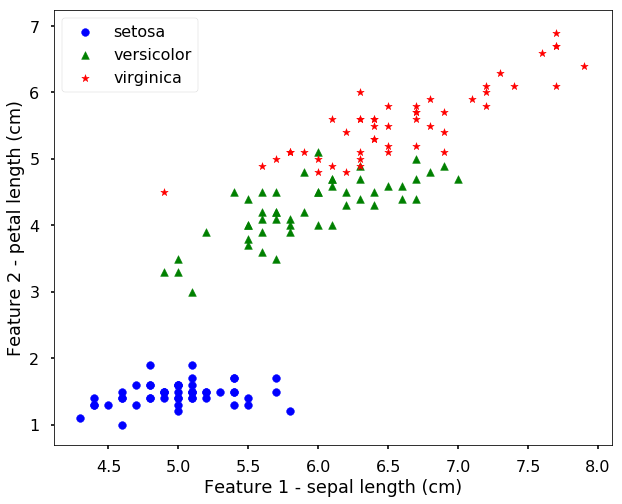

In [3]:
# let's have a look of the data first
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), ['b', 'g', 'r'], ['o', '^', '*'])):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], color = c, marker = s, s = 60, label = target_names[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

## Train a SVM

We will first use a Support Vector Machine to classify the data. You can find the intuitive explaination in the previous blog - [Support Vector Machine](http://qingkaikong.blogspot.com/2016/12/machine-learning-7-support-vector.html). Pay attention to the API we use, since they will be all similar across different classifiers in the scikit-learn. It has the work steps like this (a very typical workflow, but there will be more things when we use the model in real-world dataset, we will talk this in the future weeks. For now, just get ourselves familar with the API):

1. initialize the model
2. train the classifier use the 'fit' function. 
3. then you can estimate the incoming new data class use the 'predict' function

In [4]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier with data
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## The training results  

In [5]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's view the performance on the training data, we will plot the confusion matrix. Also, we will plot the decision boundary, which will help us understand more of the capability of the classifier (since we only have two selected features, this makes us eaiser to view the decision boundary).

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(10, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

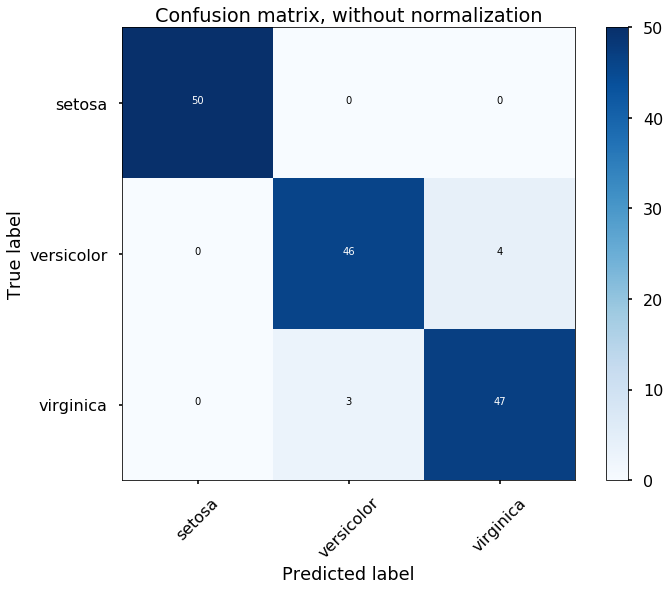

In [7]:
# predict results from the test data
predicted = clf.predict(X)

# plot the confusion matrix
cm = confusion_matrix(y,predicted)
plot_confusion_matrix(cm, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

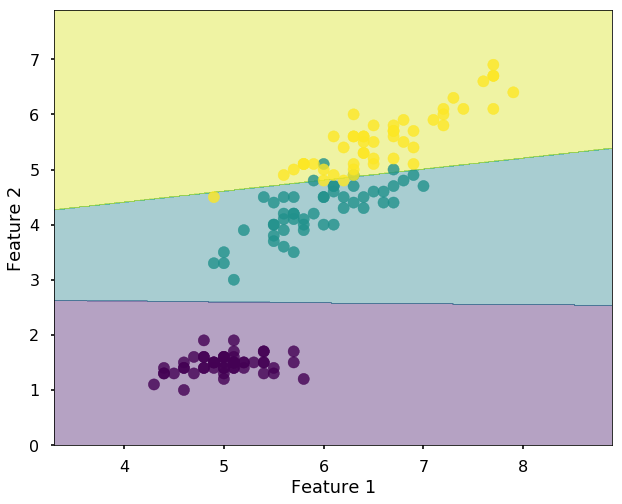

In [8]:
plot_desicion_boundary(X, y, clf)

## Using Artificial Neural Network

In this section, we will train an artificial neural network on the same data, and you will find the API is very similar, and you just need to understand some different arguments when you initialize the model. If you are not familar with the artificial neural network, you can find my [previous blog](http://qingkaikong.blogspot.com/2016/11/machine-learning-3-artificial-neural.html) for an intuitive explanation.  

In [9]:
from sklearn.neural_network import MLPClassifier

# Initialize ANN classifier

# create an ANN with two hidden layers, each with 10 neurons
hidden_layer_sizes = (10, 10)

# using a logistic activation function
activation = 'logistic'

mlp = MLPClassifier(hidden_layer_sizes= hidden_layer_sizes, activation=activation, \
                    max_iter = 2000, random_state=13)
                    
# Train the classifier with the traning data
mlp.fit(X,y)

# predict results from the test data
predicted = mlp.predict(X)

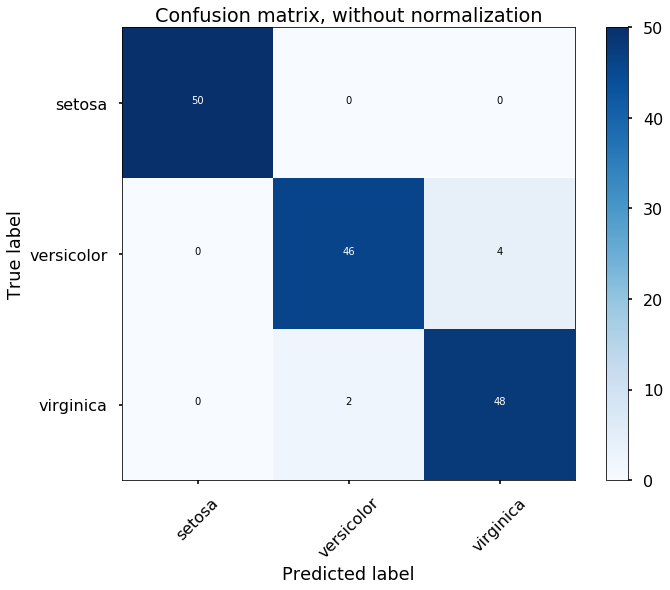

In [10]:
# plot the confusion matrix
cm = confusion_matrix(y,predicted)
plot_confusion_matrix(cm, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

## References

* [Intro-to-sklearn](https://github.com/PythonWorkshop/intro-to-sklearn)
* [sklearn tutorial](https://github.com/jakevdp/sklearn_tutorial) by [Jake Vanderplas](https://staff.washington.edu/jakevdp/)
* [Python Machine Learning](https://www.amazon.com/Python-Machine-Learning-Sebastian-Raschka/dp/1783555130/) by [Sebastian Raschka](https://sebastianraschka.com/)
* [sklearn documentation](http://scikit-learn.org/stable/documentation.html)  
* [sklearn examples](http://scikit-learn.org/stable/auto_examples/index.html)  
